In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

Using TensorFlow backend.


In [2]:
class_path = "C:/Users/Ghevond/Desktop/Astro/DataCreation/Dataset/Train/"
data_train = []
data_train_names = os.listdir(class_path)
pattern = "*.tiff"
for entry in data_train_names:
    if fnmatch.fnmatch(entry, pattern):
            data_train.append(class_path+entry)

In [3]:
class_path = "C:/Users/Ghevond/Desktop/Astro/DataCreation/Dataset/Test/"
data_test = []
data_test_names = os.listdir(class_path)
pattern = "*.tiff"
for entry in data_test_names:
    if fnmatch.fnmatch(entry, pattern):
            data_test.append(class_path+entry)

In [4]:
print(len(data_train_names), len(data_train))
print(len(data_test_names), len(data_test))

1876 1876
536 536


In [5]:
data_train_list = []
for i in range(len(data_train)):
    arr_obj = []
    cl = (data_train[i].split("/")[8]).split("~~~")[0]
    if cl == "Sy1" or cl == "cv" or cl == "QSO" or cl == "WD": continue
    #if cl == "C" or cl == "M" or cl == "Mrk" or cl == "PN" or cl == "sd": continue
    arr_obj.append(cl)
    arr_obj.append(data_train[i])
    data_train_list.append(arr_obj)
    
data_test_list = []
for i in range(len(data_test)):
    arr_obj = []
    cl = (data_test[i].split("/")[8]).split("~~~")[0]
    if cl == "Sy1" or cl == "cv" or cl == "QSO" or cl == "WD": continue
    #if cl == "C" or cl == "M" or cl == "Mrk" or cl == "PN" or cl == "sd": continue
    arr_obj.append(cl)
    arr_obj.append(data_test[i])
    data_test_list.append(arr_obj)

In [6]:
print(len(data_train_list), len(data_test_list))

1351 385


In [7]:
df_train = pd.DataFrame(data_train_list)
df_test = pd.DataFrame(data_test_list)

In [8]:
df_train.head()

,0,1
0,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
1,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
2,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
3,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
4,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...


In [9]:
df_test.head()

,0,1
0,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
1,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
2,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
3,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...
4,C,C:/Users/Ghevond/Desktop/Astro/DataCreation/Da...


In [10]:
df_train[0].value_counts()

sd     550
C      331
Mrk    305
M      154
PN      11
Name: 0, dtype: int64

In [11]:
df_test[0].value_counts()

sd     157
C       94
Mrk     86
M       44
PN       4
Name: 0, dtype: int64

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train[0])
df_train[0]=le.transform(df_train[0])

In [13]:
df_train[0].value_counts()

0    256
1    133
2    110
3     26
Name: 0, dtype: int64

In [14]:
for index, Row in df_test.iterrows():
    cl = Row[0]
    if cl == 'QSO':
        df_test.at[index, 0] = 0
    elif cl == "Sy1":
        df_test.at[index, 0] = 1
    elif cl == "WD":
        df_test.at[index, 0] = 2
    elif cl == "cv":
        df_test.at[index, 0] = 3
#    elif cl == "WD":
 #       df_test.at[index, 0] = 4
 #   elif cl == "PN":
  #      df_test.at[index, 0] = 3
    #elif cl == "WD":
    #    df_test.at[index, 0] = 6
    #elif cl == "cv":
    #    df_test.at[index, 0] = 7
    #elif cl == "PN":
    #    df_test.at[index, 0] = 3

In [15]:
df_test[0].value_counts()

0    73
1    38
2    32
3     8
Name: 0, dtype: int64

In [16]:
X_tr = df_train.iloc[:, 1]
Y_tr = df_train.iloc[:, 0]
X_tr = X_tr.values
Y_tr = Y_tr.values

X_ts = df_test.iloc[:, 1]
Y_ts = df_test.iloc[:, 0]
X_ts = X_ts.values
Y_ts = Y_ts.values

In [17]:
images_list_train = []
max_width = 0
max_height = 0
ind = 0
for i in range(len(X_tr)):
    im = Image.open(X_tr[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_train.append(arr)
    
images_list_test = []
ind = 0
for i in range(len(X_ts)):
    im = Image.open(X_ts[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list_test.append(arr)

In [20]:
print(max_width, max_height)

50 160


In [21]:
max_width = 50
max_height = 160

In [22]:
for i in range(len(images_list_train)):
    s = images_list_train[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_train[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_train[i] = arr.flatten()

for i in range(len(images_list_test)):
    s = images_list_test[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list_test[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list_test[i] = arr.flatten()

In [23]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
#print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

50 160


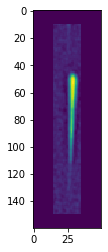

In [24]:
width = max_width
height = max_height
print(width, height)
plt.imshow(images_list_train[25].reshape(160, 50))

In [25]:
images_np_train = np.array(images_list_train)
images_np_test = np.array(images_list_test)

In [26]:
class_count = 4
X_train = images_np_train
Y_train = Y_tr
Y_train = keras.utils.to_categorical(Y_train, class_count)

X_test = images_np_test
Y_test = Y_ts
Y_test = keras.utils.to_categorical(Y_test, class_count)

In [27]:
X_train = X_train.reshape(X_train.shape[0], max_height, max_width, 1)
X_test = X_test.reshape(X_test.shape[0], max_height, max_width, 1)
input_shape = (max_height, max_width, 1)

In [28]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (525, 160, 50, 1)
525 train samples
151 test samples


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), input_shape=input_shape, padding="same"))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 2)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(class_count,activation=tf.nn.softmax))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 160, 50, 128)      1280      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 160, 50, 128)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 160, 50, 128)      147584    
_________________________________________________________________
activation_9 (Activation)    (None, 160, 50, 128)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 160, 25, 128)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 160, 25, 64)       73792     
_________________________________________________________________
activation_10 (Activation)   (None, 160, 25, 64)       0         
__________

In [45]:
adadelta = optimizers.Adadelta(lr=0.1, rho=0.95)
model.compile(optimizer=adadelta , loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#cw = {0:3, 1:4, 2:3, 3:4, 4:3}
cw = {0:1, 1:1, 2:1, 3:2}
#1 stage 35
#2 stage 
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 8, shuffle=True, validation_data=(X_test, Y_test), class_weight=cw)

Train on 525 samples, validate on 151 samples
Epoch 1/5
525/525 [==============================] - 40s 76ms/step - loss: 0.9879 - acc: 0.6076 - val_loss: 0.9026 - val_acc: 0.5629
Epoch 2/5
525/525 [==============================] - 40s 77ms/step - loss: 0.9612 - acc: 0.5810 - val_loss: 0.9017 - val_acc: 0.5563
Epoch 3/5
480/525 [==========================>...] - ETA: 3s - loss: 0.9305 - acc: 0.5813

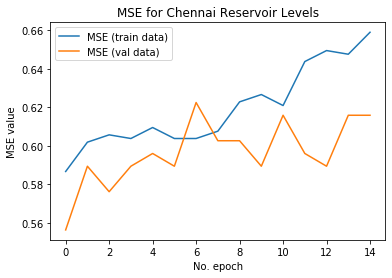

In [39]:
plt.plot(history.history['acc'], label='MSE (train data)')
plt.plot(history.history['val_acc'], label='MSE (val data)')
plt.title('CNN Acc')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [35]:
prediction = model.predict(X_test)

In [36]:
for i in range(len(prediction)):
    prediction[i] = prediction[i] > 0.5

In [37]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

this_y = Y_test
print('Accuracy:', accuracy_score(this_y, prediction))
print ('F1 score:', f1_score(this_y, prediction, average = "weighted"))
print ('Recall:', recall_score(this_y, prediction, average = "weighted"))
print ('Precision:', precision_score(this_y, prediction, average = "weighted"))
print ('\n clasification report:\n', classification_report(this_y,prediction))
print ('\n confussion matrix:\n',confusion_matrix(this_y, prediction))

Accuracy: 0.3841059602649007
F1 score: 0.4630373400007884
Recall: 0.3841059602649007
Precision: 0.5851752773881114

 clasification report:
               precision    recall  f1-score   support

           0       0.62      0.38      0.47        73
           1       0.45      0.34      0.39        38
           2       0.81      0.53      0.64        32
           3       0.00      0.00      0.00         8

   micro avg       0.61      0.38      0.47       151
   macro avg       0.47      0.31      0.38       151
weighted avg       0.59      0.38      0.46       151
 samples avg       0.38      0.38      0.38       151



C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ghevond\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


ValueError: multilabel-indicator is not supported

In [76]:
model_json = model.to_json()
with open("deep_model_16bit_07~02~2020.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("deep_model_16bit_07~02~2020.h5")
print("Saved model to disk")

Saved model to disk
